### Explore the data-files in the repository and familiarize with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make a map that assigns the total number of memory operations per element to a given algorithm

In [4]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,'dz':3,
         'arakawa':34, 'cg':51, 'ds':83}

Now, let's read in one of the csv files (actually they are "whitespace seperated values") and compute the bandwidth from the time measurements, vector size and the memory operations

In [12]:
#read in csv file
df1 = pd.read_csv('benchmark_xeon.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']*df1['Nz']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','Nz','size']+list(memops.keys())]
dfr

,n,Nx,Ny,Nz,size,scal,axpby,pointwiseDot,dot,dx,dy,dz,arakawa,cg,ds
0,3,32,32,16,1.18,75.44,80.89,89.11,9.64,22.74,23.39,43.02,35.34,34.04,58.89
1,3,32,32,32,2.36,74.90,74.26,78.43,12.52,23.16,23.27,42.41,37.22,28.61,58.80
2,3,32,32,64,4.72,83.87,116.88,47.92,12.64,22.79,22.63,45.59,29.98,27.03,58.72
3,3,32,32,128,9.44,92.90,55.33,38.42,12.62,22.48,18.74,40.21,27.90,25.50,60.16
4,3,64,64,16,4.72,76.69,111.40,48.21,12.80,23.46,23.04,41.36,29.34,27.08,34.88
5,3,64,64,32,9.44,100.14,57.77,38.67,12.45,21.92,19.90,34.13,27.20,25.17,38.95
6,3,64,64,64,18.87,51.32,38.19,35.75,12.66,21.42,18.81,28.11,26.28,24.67,41.03
7,3,64,64,128,37.75,33.96,34.25,33.51,12.82,20.52,18.11,28.16,25.61,24.32,43.81
8,3,128,128,16,18.87,48.98,38.87,35.97,12.77,20.91,21.17,25.33,27.45,24.88,25.84
9,3,128,128,32,37.75,33.32,34.25,33.77,12.92,20.61,20.83,20.82,26.94,24.06,26.84


We want to aggregate the results with the same input parameters n, Nx, Ny, Nz

In [13]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','Nz','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','Nz','size'])

In [14]:
dfr['axpby']

,mean,std
0,78.14,5.18
1,87.35,8.27
2,114.57,7.62
3,56.47,2.28
4,113.13,6.18
5,57.57,0.78
6,37.78,0.73
7,34.02,0.44
8,38.26,0.60
9,33.87,0.30


Here, we compute the efficiency of the operations

In [15]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 256 256 128
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [16]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','Nz','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [17]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:20]

,n,Nx,Ny,Nz,size,scal,axpby,pointwiseDot,dot,dx,...,scal,axpby,pointwiseDot,dot,dx,dy,dz,arakawa,cg,ds
,,,,,,eff,eff,eff,eff,eff,...,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,3,32,32,16,1.18,2.35,2.65,2.95,0.34,0.72,...,3.74e-01,0.18,0.45,1.85e-02,8.26e-02,9.27e-02,1.93e-01,6.55e-02,4.35e-02,5.98e-02
16,4,32,32,16,2.10,2.43,2.91,2.63,0.42,0.62,...,2.31e-01,0.28,0.14,4.28e-03,3.76e-02,7.02e-03,2.62e-02,1.79e-02,8.55e-03,2.20e-02
1,3,32,32,32,2.36,2.50,2.96,2.41,0.43,0.78,...,2.20e-01,0.28,0.30,2.35e-03,5.81e-03,7.47e-03,3.32e-02,3.10e-02,1.36e-02,4.95e-02
17,4,32,32,32,4.19,2.65,3.82,1.77,0.43,0.66,...,1.58e-01,0.24,0.05,2.73e-03,2.77e-03,9.95e-03,1.62e-02,4.36e-03,1.14e-02,4.07e-02
2,3,32,32,64,4.72,2.62,3.88,1.63,0.43,0.77,...,1.72e-01,0.26,0.03,5.27e-03,3.15e-02,1.88e-02,3.23e-02,8.21e-03,9.30e-03,5.03e-02
4,3,64,64,16,4.72,2.75,3.83,1.63,0.43,0.79,...,1.24e-01,0.21,0.03,3.62e-03,8.12e-03,1.15e-02,7.89e-03,6.08e-03,6.70e-03,5.56e-02
18,4,32,32,64,8.39,3.12,2.31,1.31,0.43,0.65,...,1.24e-01,0.10,0.03,1.02e-03,6.54e-03,6.71e-03,2.18e-02,6.36e-03,5.58e-03,1.37e-02
20,4,64,64,16,8.39,3.20,2.29,1.31,0.43,0.64,...,1.93e-01,0.07,0.03,5.18e-03,1.36e-02,5.01e-03,7.32e-02,9.10e-03,4.06e-03,6.17e-03
3,3,32,32,128,9.44,3.15,1.91,1.28,0.42,0.76,...,9.30e-02,0.08,0.03,5.77e-03,1.15e-02,1.78e-02,4.18e-02,5.64e-03,7.42e-03,1.40e-02


Let us try and make our first plot

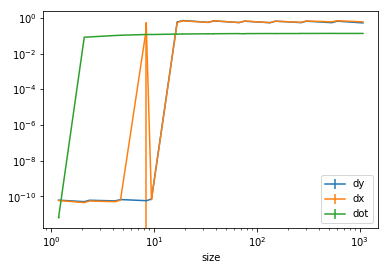

In [11]:
fig=plt.figure()
#print(efficiency)
toPlot=efficiency['dy'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err')
toPlot=efficiency['dx'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
toPlot=efficiency['dot'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/usr/lib/python3/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


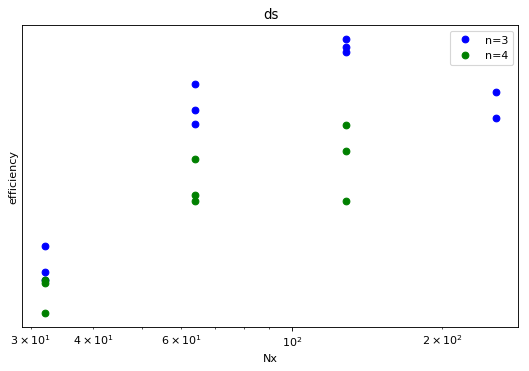

In [25]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('ds','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=3','n=4'])
plt.show()
#base_bandwidth